In [6]:
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import pandas as pd

In [2]:
path = '/Users/josejoy/Desktop/ECE 271B Stat Learning /project/CSV folder/'
class_labels = {str(x):x for x in range(10)}
class_labels.update({'\\pi':10, '\\times':11, '\\%':12, '-':13, '/':14, '<':15, '>':16, '\\div':17, '+':18})

def load_data(class_labels, train=0.85, val=0.15):
    data = pd.read_csv(path + 'final_data.csv', header=None)
    
#     data[data>0]=1
    
    labels = pd.read_csv(path + 'final_label.csv', header=None, names=['labels'])
    labels['labels'] = labels['labels'].map(class_labels)
    assert data.shape[0] == labels.shape[0]
    assert isinstance(train, float)
    isinstance(val, float), "train and val must be of type float, not {0} and {1}".format(type(train), type(val))
    assert ((train + val) == 1.0), "train + val must equal 1.0"

    one_hot = pd.get_dummies(labels['labels'])
    sidx = int(data.shape[0]*train)
    _data  = {'train': data.iloc[:sidx].as_matrix(),   'val': data.iloc[sidx+1:].as_matrix()}
    _labels= {'train': one_hot.iloc[:sidx,:].as_matrix(), 'val': one_hot.iloc[sidx+1:,:].as_matrix()}

    assert (_data['train'].shape[0] == _labels['train'].shape[0])
    assert (_data['val'].shape[0] == _labels['val'].shape[0])
    return _data, _labels

data, labels = load_data(class_labels)


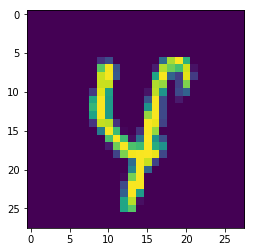

In [3]:
plt.imshow( data['train'][1,:].reshape([28,28]))
plt.show()

In [ ]:
%%time
train_label = np.argmax(labels['train'], axis = 1)
RFmodel = RandomForestClassifier(max_depth=4, n_estimators=5000, class_weight='balanced' )
RFmodel.fit(data['train'],train_label)
pred = RFmodel.predict(data['val'])
test_label = np.argmax(labels['val'], axis = 1)
error1 = np.sum([pred!=test_label])*100/test_label.shape[0]
print( error1 )
plt.imshow( RFmodel.feature_importances_.reshape([28,28]) ,cmap = 'gray' )
plt.show()


Stage1 error =  0.0


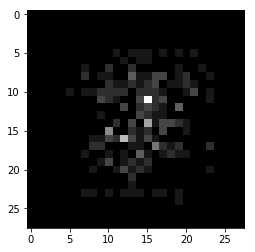

In [158]:
# BInary classifer for Digits - Character classification
bin_label = np.argmax(labels['train'], axis = 1)
bin_label[bin_label<10] = 1
bin_label[bin_label>=10] = -1
stage1 = AdaBoostClassifier( n_estimators=250)
stage1.fit(data['train'],bin_label )
pred1 = stage1.predict(data['val'])
test = np.argmax(labels['val'], axis = 1)
test[test<10] = 1
test[test>=10] = -1
print( 'Stage1 error = ',sum( pred1!=test )*100/ test.shape[0])
plt.imshow( stage1.feature_importances_.reshape([28,28]) ,cmap = 'gray' )
plt.show()

In [211]:
label1 = np.argmax(labels['train'],axis=1)
label1[label1>=10] = -1
label2 = np.argmax(labels['train'],axis=1)
label2[label2<10] = -1
digits = AdaBoostClassifier( n_estimators=200, learning_rate=0.1) # contains binary classifiers (one vs all) for each digit
chars =  AdaBoostClassifier( n_estimators=200, learning_rate=0.1) # contains binary classifiers (one vs all) for each digit
digits.fit(data['train'][label1!=-1],label1[label1!=-1])
chars.fit(data['train'][label2!=-1],label2[label2!=-1])

pred1 = stage1.predict(data['val'])
pred_d = digits.predict(data['val'])
pred_c = chars.predict(data['val'])
test_full = np.argmax(labels['val'],axis=1)
pred_d[pred1==-1] = -1
pred_c[pred1==1] = -1
pred = np.column_stack((pred_d,pred_c))
predx = np.max(pred,axis= 1)
print( 'Stage2 error = ',sum( predx!=test_full )*100/ test_full.shape[0])


Stage2 error =  23.9820200952


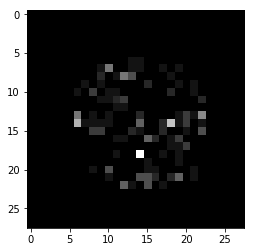

In [215]:
plt.imshow( chars.feature_importances_.reshape([28,28]) ,cmap = 'gray' )
plt.show()